# Výjimky (exceptions)

Python používá ke zpracování chyb výjimky. Ne každý jaChyby v programu napsaném v Pythonu jsou v zásadě dvojího druhu:

1. `SyntaxError`
2. Všechny ostatní

K `SyntaxError` dochází ve fázi čtení, tj. když parser prochází zdojový kód. Je to tak jediná chyba, která se za normálních okolností nedá zachytit (někdy jo, ale o tom jindy). Všechny ostatní chyby lze zachytit a zareagovat na ně nějakým žádoucím způsobem. Začněme jednoduchým příkladem dobře čitelné chyby. Když dojde k neošetřené chybě, Pythoní interpret nám napíše, k jaké chybě došlo a vypíše její `stack trace` (někdy traceback), tedy kde k té chybě došlo

In [1]:
a = 1
b = 0
a / b # raises ZeroDivisionError

ZeroDivisionError: division by zero

Zde vidíme, že chyba je typu `ZeroDivisionError` a došlo k ní na řádku 3. To je celkem čitelné. Zkusme chybu zabalit do nějaké funkce. a podívat se, jak se traceback změní.

In [2]:
def f(a, b):
    return a / b

f(1, 0)

ZeroDivisionError: division by zero

Traceback je teď složitější, ale stále čitelný - postupuje zvenku dovnitř a ukazuje, v jaké funkci na jaké řádku k chybě došlo. To je velmi užitečné.

## Try / except

Chyby - výjimky - takzvaně _zachytáváme_ a činíme tak pomocí dvojice bloků `try` a `except`. V bloku `try` spouštíme kód, u kterého máme podezření, že by mohl vyvolat (raise) nějakou výjimku, blokem `except` výjimku zachytáváme (v jiných jazycích se tento blok nazývá catch block).

In [ ]:
def f(a, b):
    a / b

try:
    f(1, 0)
except ZeroDivisionError:
    print("oi, we do not divide by zero")

print("the rest of the program")

Vidíme, že přestože k chybě došlo, zachytili jsme ji a zpracovali, takže program nespadl. To je žádoucí stav, ke kterému se obvykle budeme snažit směřovat.

Jak zjistíme, jakou výjimku zachytit? Buď zkusíme kód spustit tak, aby selhal, a chybu najdeme na konci stack trace, nebo ji vyhledáme v dokumentaci - často potkáme fráze jako: "raises ThatAndThatError if beans not hot enough".

Např. u typu `dict` se v dokumentaci píše:

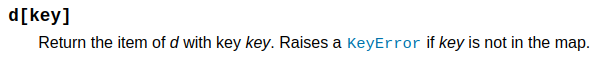

Vyzkoušejme:

In [ ]:
d = {
    "a": 1,
    "b": 0
}

try:
    d["c"]
except KeyError:
    print("ejhle, ono to funguje")

print("zbytek programu...")

Můžeme také zřetězit několik `except` bloků za sebou a zachytávat postupně různé výjimky, nebo zachytit více výjimek v jednom `except` bloku.

In [ ]:
from random import randint

def faulty_function():
    i = randint(1, 3)
    match i:
        case 1:
            raise KeyError("fake key error")
        case 2:
            raise ZeroDivisionError("fake zero division error")
        case 3:
            raise AttributeError("fake attribute error")

try:
    faulty_function()
except (KeyError, AttributeError):
    print("this is the first except block")
except ZeroDivisionError:
    print("this is the second except block")

## Výjimka jako objekt

Každou odchycenou výjimku můžeme lapit do proměnné a získat ještě dodatečné informace. Každá výjimka obsahuje mimo jiných atributy `args` (obsahující konkrétní parametry) a `__traceback__` (obsahující stack trace). Abychom ale traceback mohli číst, potřebujeme použít modul `traceback`.

In [3]:
import traceback

def a_funky_function():
    d = {}
    d["non-existent-key"]

try:
   a_funky_function()
except KeyError as e:
    print(e.args)
    traceback.print_tb(e.__traceback__)

print("rest of the program")

('non-existent-key',)
rest of the program


  File "/var/folders/ph/p8b85z1j67v9t760hygssjym0000gp/T/ipykernel_22974/4267090218.py", line 8, in <module>
    a_funky_function()
  File "/var/folders/ph/p8b85z1j67v9t760hygssjym0000gp/T/ipykernel_22974/4267090218.py", line 5, in a_funky_function
    d["non-existent-key"]


Je možné zachytit i zcela obecnou výjimku - všechny výjimky jsou typu `Exception`:

In [4]:
try:
    1/0
except Exception as e: # toto zachytí jakoukoliv výjimku
    print(e.args) 

('division by zero',)


## Nikdy

ale vážně nikdy (to znamená v žádném případě) a to tak, že za žádných okolností, neděláme toto:

In [ ]:
try:
    1 / 0 # jakykoliv vadny kod
except:
    pass

Nezpracovaná, ale zachycěná výjimka znamená, že program nespadne, ale my o chybě vůbec nevíme. To znaměná, že se velmi špatně hledá.

## Finally (a else)

Kromě bloků `try` a `except` máme ještě bloky `else` a `finally`. Blok `else` následuje bezprostředně po `except` bloku (blocích) a vykoná se pouze v případě, že k žádné výjimce nedošlo. Blok `finally` je poslední a vykoná se vždy. Jeho smyslem je uklidit, tj. uzavřít otevřená spojení, navrátit zdroj atd. Následující příklad vše ilustruje - soubor se uzavře, ať už se stance v průběhu čtení cokoliv.


In [ ]:
try:
    f = open("file.txt", "r")
    content = f.read()
except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print("Some other error occured")
else:
    print("File read successfully.")
finally:
    if 'f' in locals(): # overi, jestli symbol f vubec existuje, tj. jestli se soubor vubec povedlo otevrit
        f.close()
    print("File closed.")

## Vyvolání výjimky

Výjimku samozřejmě můžeme i vyvolat. Používá se k tomu klíčové slovo `raise`. Seznam v pythonu dostupných výjimek nalezneme v dokumentaci - [zde](https://docs.python.org/3/library/exceptions.html). S ohledem na kontext můžeme použít kteroukoliv z nich.

In [ ]:
def my_function_raising_exceptions(x):
    if x == 0:
        raise ValueError("argument x is not supposed to be zero")

try:
    my_function_raising_exceptions(0)
except ValueError as e:
    print(e.args)

## Kdy zachytit?

Obecně se říká, že výjimka by se měla zachytit co nejblíže svému vzniku. Důvodů je řada, mezi hlavní patří např. kontext, za kterého výjimka vznikla (je dostupný, čitelný a výjimka snadno odstranitelná), čitelnost nebo třeba rychlost - v průběhu zpracování výjimky dochází k něčemu, čemu se říká stack unwinding - odvíjení zásobníku - Python postupně prochází zásobník volaných funkcí (call stack) a hledá, zda tam není někdo, koho ta výjimka zajímá (`except` blok). Když nikoho nenajde, program selže.

Následující série příkladů ilustruje, jaký vliv na celkový program má to, kde výjimku zachytíte. Můžete si k zachycení přípsat i traceback.

In [ ]:
def may_throw():
    raise RuntimeError("oh no, it happened")
        
def subprogram():
    print("this is subprogram, doing subprogram things")
    may_throw()
    print("subprogram finished")
    
def mainprogram():
    print("this is the main program, doing main program things")
    print("calling subprogram")
    subprogram()
    print("mainprogram finished")
        
mainprogram()

In [ ]:
def may_throw():
    raise RuntimeError("oh no, it happened")
        
def subprogram():
    print("this is subprogram, doing subprogram things")
    try:
        may_throw()
    except:
        print("oh no it failed")
    print("subprogram finished")
    
def mainprogram():
    print("this is the main program, doing main program things")
    print("calling subprogram")
    subprogram()
    print("mainprogram finished")
        
mainprogram()

In [ ]:
def may_throw():
    raise RuntimeError("oh no, it happened")
        
def subprogram():
    print("this is subprogram, doing subprogram things")
    may_throw()
    print("subprogram finished")

    
def mainprogram():
    print("this is the main program, doing main program things")
    print("calling subprogram")
    subprogram()
    print("mainprogram finished")
    
try:        
    mainprogram()
except:
    print("oh no it failed")